<a href="https://colab.research.google.com/github/Majid5654/Erwan-Majid_PCVK_Ganjil_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. https://colab.research.google.com/ . After making sure that Google Colab is connected
to your Github , continue by selecting the repository that was used in the lab last week ,
rename the file to "Week 6 .ipynb".

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import the following libraries that will be used during the following week 6 practicum
trial.

In [6]:
import cv2 as cv
from google.colab.patches import cv_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

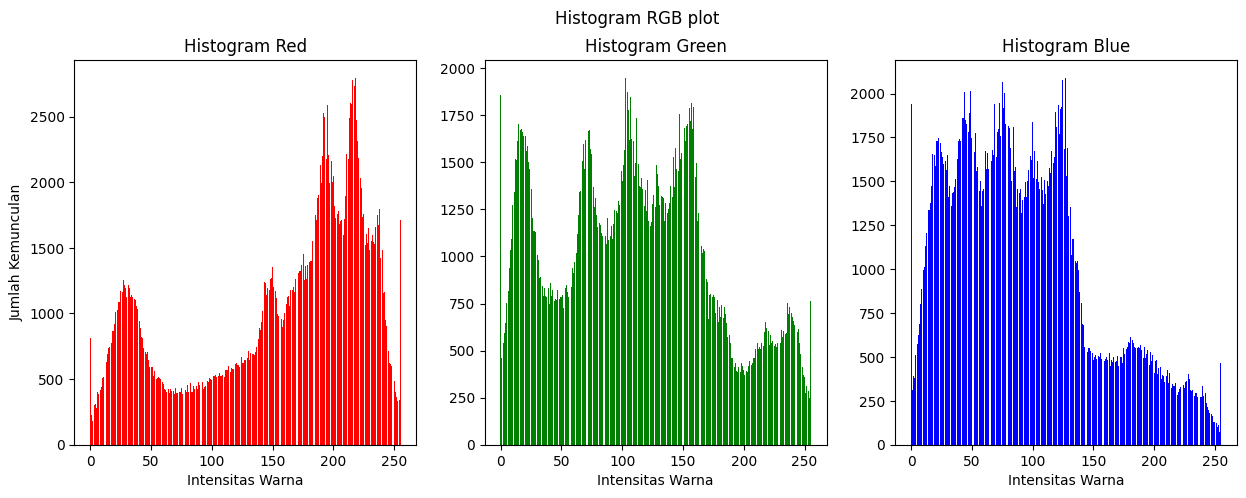

In [11]:
# === [Flowchart: Start + Input Image] ===
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

# === [Flowchart: Menghitung jumlah kemunculan pixel] ===
histR = np.zeros(256, dtype=int)
histG = np.zeros(256, dtype=int)
histB = np.zeros(256, dtype=int)

height, width, _ = img.shape
for y in range(height):
    for x in range(width):
        histR[R[y, x]] += 1
        histG[G[y, x]] += 1
        histB[B[y, x]] += 1

# === [Flowchart: Membuat histogram & Output] ===
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].bar(np.arange(256), histR, color='red')
axs[0].set_title("Histogram Red")
axs[0].set_xlabel("Intensitas Warna")
axs[0].set_ylabel("Jumlah Kemunculan")

axs[1].bar(np.arange(256), histG, color='green')
axs[1].set_title("Histogram Green")
axs[1].set_xlabel("Intensitas Warna")

axs[2].bar(np.arange(256), histB, color='blue')
axs[2].set_title("Histogram Blue")
axs[2].set_xlabel("Intensitas Warna")

plt.suptitle("Histogram RGB plot")
plt.show()

# === [Flowchart: End] ===

4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

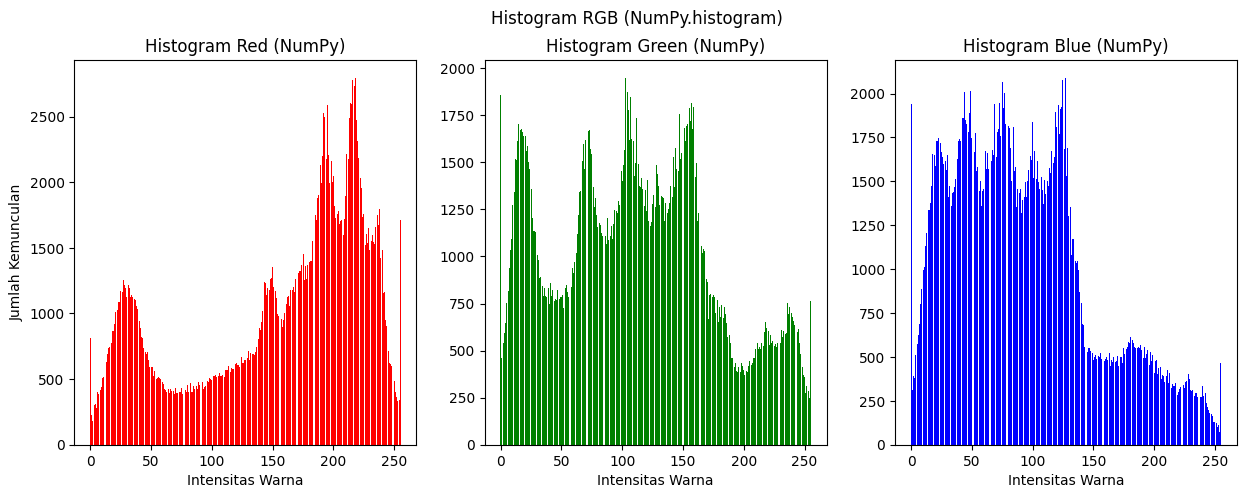

In [27]:
# === Input Image (RGB) ===
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Pisahkan channel
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]

# === Histogram dengan NumPy ===
histR, binsR = np.histogram(R, bins=256, range=(0,256))
histG, binsG = np.histogram(G, bins=256, range=(0,256))
histB, binsB = np.histogram(B, bins=256, range=(0,256))

# === Plot Histogram ===
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].bar(binsR[:-1], histR, color='red')
axs[0].set_title("Histogram Red (NumPy)")
axs[0].set_xlabel("Intensitas Warna")
axs[0].set_ylabel("Jumlah Kemunculan")

axs[1].bar(binsG[:-1], histG, color='green')
axs[1].set_title("Histogram Green (NumPy)")
axs[1].set_xlabel("Intensitas Warna")

axs[2].bar(binsB[:-1], histB, color='blue')
axs[2].set_title("Histogram Blue (NumPy)")
axs[2].set_xlabel("Intensitas Warna")

plt.suptitle("Histogram RGB (NumPy.histogram)")
plt.show()

The results of the histogram created manually (Step 3) and the one generated using NumPy’s built-in np.histogram function (Step 4) are identical. Both methods calculate the frequency of pixel intensities ranging from 0 to 255 for each color channel (Red, Green, and Blue). In the manual method, the pixel values are iterated one by one, and the frequency count is updated for each intensity level. Meanwhile, NumPy’s function directly computes the histogram distribution in a more efficient and concise way. When the two histograms are plotted together, their curves overlap perfectly, and numerical comparison confirms that the values are exactly the same. Therefore, the difference lies only in the implementation approach, while the output remains the same

5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

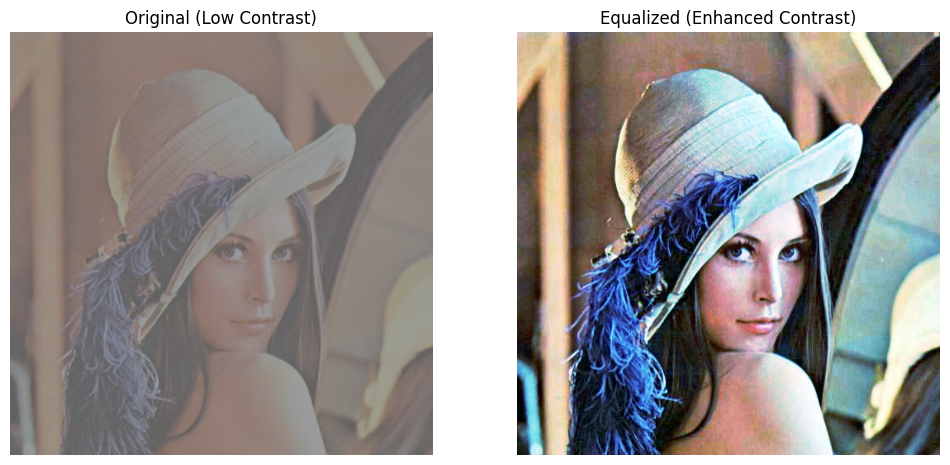

/tmp/ipython-input-2545772954.py:72: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(channels_orig[i].ravel(), 256, [0,256], color=col)
/tmp/ipython-input-2545772954.py:78: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(channels_eq[i].ravel(), 256, [0,256], color=col)


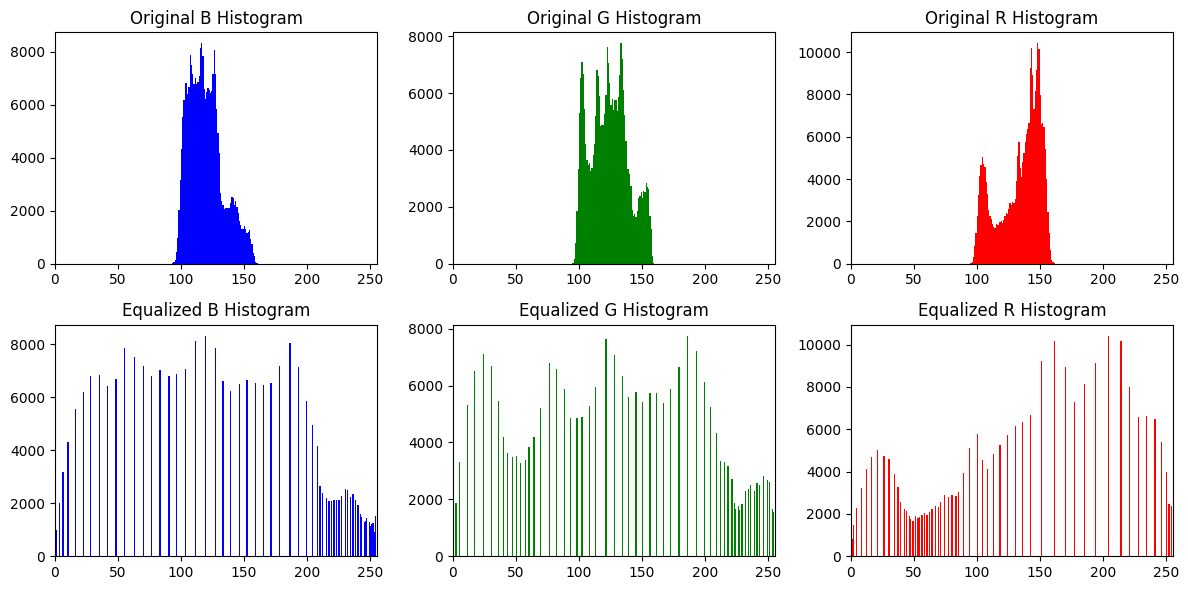

In [39]:
# Load low-contrast Lena color image
img_color = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
# Flowchart Step: Input image

# Fungsi manual histogram equalization
def manual_hist_eq(channel):
    # Hitung histogram
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])
    # Flowchart Step: Menghitung jumlah kemunculan setiap pixel (Frekuensi)

    # Hitung cumulative distribution function (CDF)
    cdf = hist.cumsum()
    # Flowchart Step: Penjumlahan kumulatif dari frekuensi

    # Masking nilai nol
    cdf_m = np.ma.masked_equal(cdf, 0)

    # Normalisasi sesuai rumus Ko
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # Flowchart Step: Normalisasi dengan kumulatif frekuensi (Skala warna)

    # Isi kembali nilai kosong dengan nol
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    # Flowchart Step: Implementasi rumus Ko (mapping nilai pixel)

    # Transformasi pixel sesuai CDF
    channel_eq = cdf_final[channel]
    # Flowchart Step: Hasil Histogram Equalization (per channel)

    return channel_eq

# Pisahkan channel BGR
b, g, r = cv.split(img_color)
# Flowchart Step: Proses dilakukan per channel warna

# Equalize masing-masing channel secara manual
b_eq = manual_hist_eq(b)
g_eq = manual_hist_eq(g)
r_eq = manual_hist_eq(r)
# Flowchart Step: Histogram Equalization (per channel)

# Gabungkan kembali
img_eq_color = cv.merge((b_eq, g_eq, r_eq))
# Flowchart Step: Transformasi kembali dalam bentuk citra

# Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Flowchart Step: Citra Hasil Histogram Equalization

axes[0].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axes[0].set_title("Original (Low Contrast)")
axes[0].axis("off")

axes[1].imshow(cv.cvtColor(img_eq_color, cv.COLOR_BGR2RGB))
axes[1].set_title("Equalized (Enhanced Contrast)")
axes[1].axis("off")

plt.show()
# Flowchart Step: End

# ===============================
# Plot histogram sebelum & sesudah
# ===============================
colors = ('b', 'g', 'r')
channels_orig = (b, g, r)
channels_eq = (b_eq, g_eq, r_eq)

plt.figure(figsize=(12,6))
for i, col in enumerate(colors):
    # Histogram original
    plt.subplot(2, 3, i+1)
    plt.hist(channels_orig[i].ravel(), 256, [0,256], color=col)
    plt.title(f'Original {col.upper()} Histogram')
    plt.xlim([0,256])

    # Histogram equalized
    plt.subplot(2, 3, i+4)
    plt.hist(channels_eq[i].ravel(), 256, [0,256], color=col)
    plt.title(f'Equalized {col.upper()} Histogram')
    plt.xlim([0,256])

plt.tight_layout()
plt.show()


The program begins by loading the low-contrast Lena image as input, which corresponds to the “Input image” step in the flowchart. Next, the image is split into its three color channels (Blue, Green, and Red) so that histogram equalization can be applied to each channel separately. Inside the manual_hist_eq function, the first step is calculating the histogram of pixel values, which counts how often each intensity value appears in the channel (“Menghitung jumlah kemunculan setiap pixel warna (Frekuensi)”). Then, the cumulative distribution function (CDF) is computed by summing the histogram frequencies step by step (“Penjumlahan kumulatif dari frekuensi”). To prevent division errors, zero values are masked before normalization. The normalization step rescales the CDF into the full intensity range 0–255 using the formula
𝐾
0
K
0
	​

, which corresponds to the flowchart’s “Normalisasi dengan kumulatif frekuensi … (Skala warna)”. After that, a mapping is created so that each original pixel value is replaced by its equalized value (“Implementasi rumus Ko”), resulting in the equalized channel (“Hasil Histogram Equalization”). Once this process is done for all three channels (B, G, R), they are merged back together to reconstruct a full-color image (“Transformasi kembali dalam bentuk citra”). Finally, both the original low-contrast image and the enhanced equalized image are displayed side by side, completing the flowchart with “Citra Hasil Histogram Equalization” and “End”

 6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

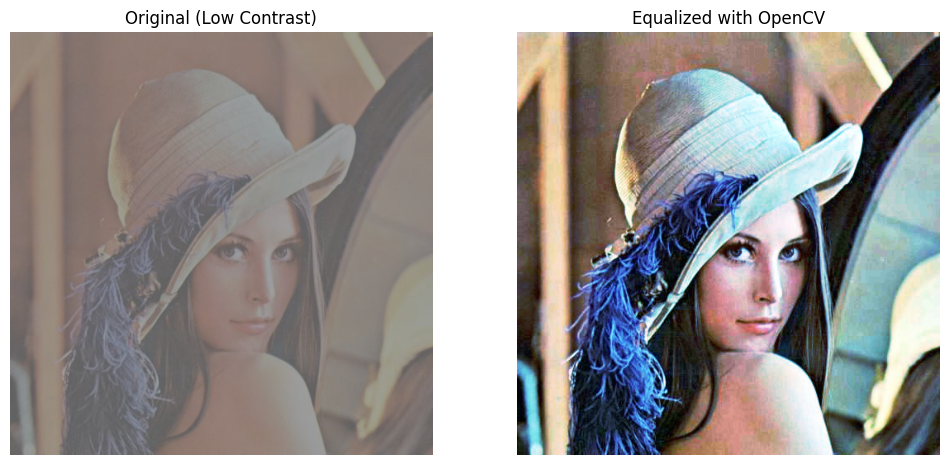

/tmp/ipython-input-1044338257.py:47: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(channels_orig[i].ravel(), 256, [0,256], color=col)
/tmp/ipython-input-1044338257.py:53: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(channels_eq[i].ravel(), 256, [0,256], color=col)


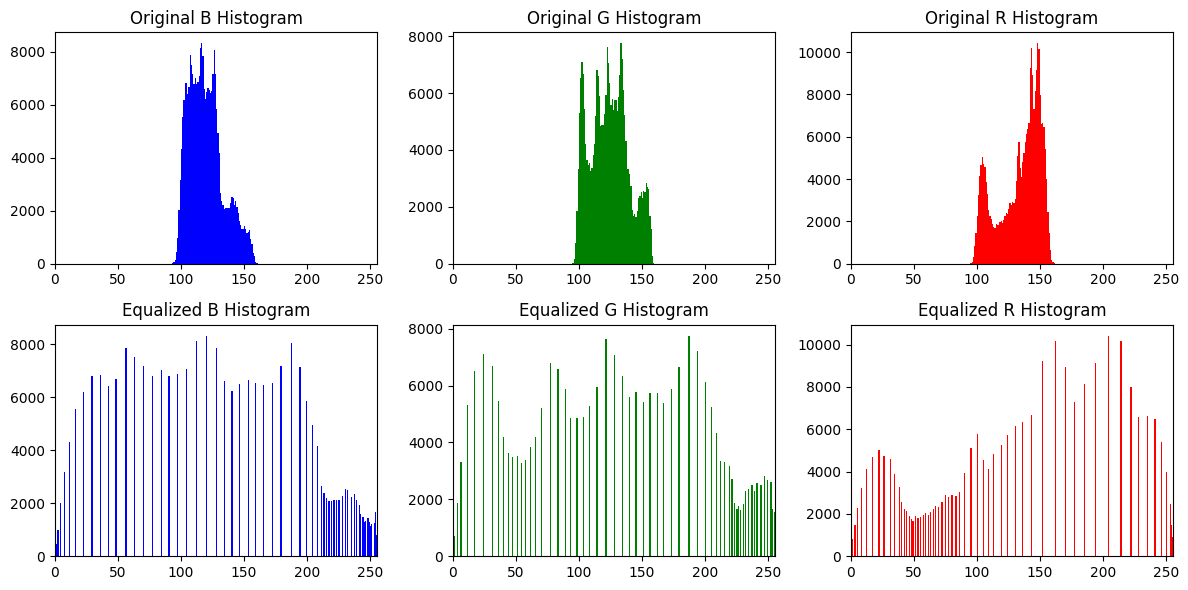

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load low-contrast Lena color image
img_color = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
# Step: Input image

# Pisahkan channel BGR
b, g, r = cv.split(img_color)

# Equalize masing-masing channel dengan OpenCV
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

# Gabungkan kembali ke citra berwarna
img_eq_color = cv.merge((b_eq, g_eq, r_eq))
# Step: Citra Hasil Histogram Equalization (versi OpenCV)

# ===============================
# Tampilkan hasil gambar
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
axes[0].set_title("Original (Low Contrast)")
axes[0].axis("off")

axes[1].imshow(cv.cvtColor(img_eq_color, cv.COLOR_BGR2RGB))
axes[1].set_title("Equalized with OpenCV")
axes[1].axis("off")

plt.show()

# ===============================
# Plot histogram sebelum & sesudah
# ===============================
colors = ('b', 'g', 'r')
channels_orig = (b, g, r)
channels_eq = (b_eq, g_eq, r_eq)

plt.figure(figsize=(12,6))
for i, col in enumerate(colors):
    # Histogram original
    plt.subplot(2, 3, i+1)
    plt.hist(channels_orig[i].ravel(), 256, [0,256], color=col)
    plt.title(f'Original {col.upper()} Histogram')
    plt.xlim([0,256])

    # Histogram equalized
    plt.subplot(2, 3, i+4)
    plt.hist(channels_eq[i].ravel(), 256, [0,256], color=col)
    plt.title(f'Equalized {col.upper()} Histogram')
    plt.xlim([0,256])

plt.tight_layout()
plt.show()


When comparing the results of manual histogram equalization and OpenCV’s built-in equalizeHist, both methods produce a very similar output because they are based on the same principle: computing the histogram, deriving the cumulative distribution function (CDF), and then remapping pixel intensities to stretch the contrast. Visually, both outputs show a significant improvement compared to the original low-contrast Lena image, with details becoming clearer and brightness distributed more evenly. However, there may be slight differences. The manual implementation can sometimes produce stronger or harsher contrast because of how normalization and rounding are handled, while OpenCV’s equalizeHist tends to produce smoother and more consistent results since it has been optimized and fine-tuned internally. Overall, the two approaches yield outputs that look almost the same to the human eye, but OpenCV’s version is more stable and efficient.

7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)


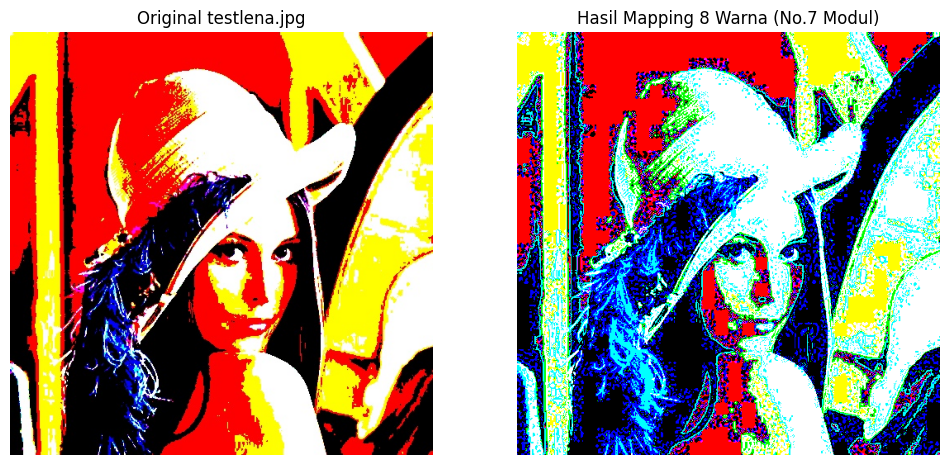

In [55]:
# Load testlena asli (usahakan full color)
img = cv.imread('/content/drive/MyDrive/PCVK/testlena.jpg')

# --- 1. Load image ---
img = cv.imread('/content/drive/MyDrive/PCVK/testlena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

h, w, _ = img.shape
total_pixels = h * w

# --- 2. Proses per channel sesuai flowchart (Histogram Equalization -> Ko, L=2) ---
quant = np.zeros_like(img, dtype=np.uint8)

for ch in range(3):
    channel = img[:, :, ch]
    hist = np.bincount(channel.flatten(), minlength=256).astype(np.float64)
    cdf = hist.cumsum()
    cdf_norm = cdf / total_pixels  # normalisasi
    Ko = np.rint(cdf_norm).astype(np.uint8)  # L=2 -> round(Ci) = 0 atau 1
    mapped = Ko[channel] * 255
    quant[:, :, ch] = mapped

# --- 3. Tampilkan hasil ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original testlena.jpg")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(quant)
plt.title("Hasil Mapping 8 Warna (No.7 Modul)")
plt.axis("off")

plt.show()